<a href="https://colab.research.google.com/github/Jeo-Jeo/Task-3/blob/main/Copy_of_Task_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("Housing.csv")


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [ ]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
parking,0
mainroad_yes,0
guestroom_yes,0
basement_yes,0
hotwaterheating_yes,0


In [ ]:
X = df.drop("price", axis=1)
y = df["price"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 436
Testing samples: 109


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


In [ ]:
print("Intercept:", model.intercept_)
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)


Intercept: 260032.35760741215
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


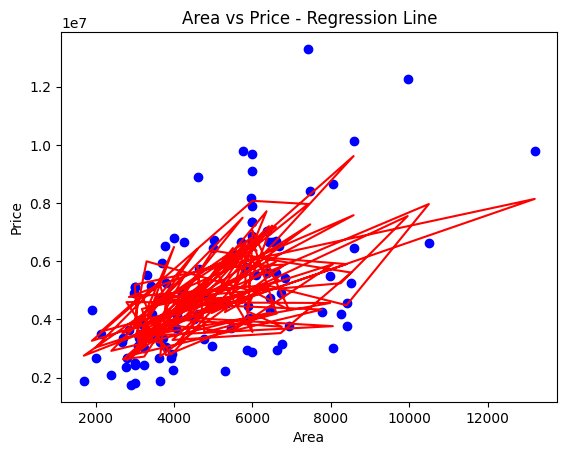

In [ ]:
plt.scatter(X_test['area'], y_test, color='blue')
plt.plot(X_test['area'], y_pred, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Regression Line")
plt.show()


In [ ]:

df.to_csv("Housing_preprocessed.csv", index=False)


In [ ]:
# Convert all boolean (True/False) values into integers (1/0)
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


/tmp/ipython-input-14-4266505680.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
# Preview updated data
df.head()
# Optional: Check column data types
df.dtypes


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
parking,int64
mainroad_yes,int64
guestroom_yes,int64
basement_yes,int64
hotwaterheating_yes,int64


In [ ]:
df.to_csv("Housing_processed.csv", index=False)